<a href="https://colab.research.google.com/github/Yonah-Tech/DATA-SCIENCE-UICT-AUGUST-2025/blob/main/Supervised_Learning_Classification_(1)_Datascience_Lecture_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Supervised Learning (Classification Algorithm)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import google.colab.files as files
uploaded = files.upload()

Saving Cars_Sale.csv to Cars_Sale.csv


In [3]:
cars = pd.read_csv('Cars_Sale.csv')
cars.head()

,Car_ID,Make,Model,Year,Price ($),Mileage (km),Fuel Type,Transmission,Owner History,Sold (Yes/No)
0,1001,Mazda,Mazda3,2013,32935.2,105354,Petrol,Manual,First Owner,No
1,1002,Kia,Sorento,2015,23799.4,94113,Petrol,Automatic,Second Owner,No
2,1003,Ford,Focus,2023,21786.0,211800,Diesel,Manual,First Owner,No
3,1004,Mazda,CX-5,2023,36836.8,40731,Diesel,Automatic,First Owner,Yes
4,1005,Mazda,CX-5,2016,34722.6,68542,Electric,Manual,Third Owner,Yes


In [4]:
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_ID         233 non-null    int64  
 1   Make           233 non-null    object 
 2   Model          233 non-null    object 
 3   Year           233 non-null    int64  
 4   Price ($)      233 non-null    float64
 5   Mileage (km)   233 non-null    int64  
 6   Fuel Type      233 non-null    object 
 7   Transmission   233 non-null    object 
 8   Owner History  233 non-null    object 
 9   Sold (Yes/No)  233 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 18.3+ KB
None


In [5]:
print(cars.describe())

            Car_ID         Year     Price ($)   Mileage (km)
count   233.000000   233.000000    233.000000     233.000000
mean   1090.888412  2016.077253  30667.817597   98226.690987
std      59.432557     4.076113  11002.899429   41951.290137
min    1001.000000  2010.000000   3894.200000   11653.000000
25%    1037.000000  2013.000000  23070.400000   63383.000000
50%    1086.000000  2016.000000  29077.000000   98627.000000
75%    1142.000000  2019.000000  37653.800000  128888.000000
max    1200.000000  2023.000000  74234.400000  211800.000000


Handle categorical features and potentially scale numerical features to prepare the data for modeling.

Identify categorical and numerical columns, apply one-hot encoding to categorical features, scale numerical features using StandardScaler, and concatenate the processed features into a single DataFrame.


In [6]:
# Separate target variable and create a dummy variable sold
y = cars['Sold (Yes/No)'].map({'Yes': 1, 'No': 0})

#Drop car ID and target variable
X = cars.drop(['Car_ID', 'Sold (Yes/No)'], axis=1)

print("Target variable 'y' shape:", y.shape)
print("Feature matrix 'X' shape:", X.shape)
print("\nClass distribution in target:")
print(y.value_counts())

Target variable 'y' shape: (233,)
Feature matrix 'X' shape: (233, 8)

Class distribution in target:
Sold (Yes/No)
1    119
0    114
Name: count, dtype: int64


## Split data

Split the data into training and testing sets for model training and evaluation.


In [7]:
#split the dataset into train and test data, before encoding or scaling to prevent data leakage
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)
print("Training target:", y_train.shape[0])
print("Testing target:", y_test.shape[0])

Training set: (186, 8)
Testing set: (47, 8)
Training target: 186
Testing target: 47


In [19]:
#Preprocessing for numerical and categorical features
#import sklearn libraries - for Machine learning in python
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline #automating machine learning workflows
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

In [9]:
# Identify categorical and numerical columns - using the independent variable training data
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()
num_features = X_train.select_dtypes(include=np.number).columns.tolist()

print("Categorical features:", cat_features)
print("Numerical features:", num_features)

Categorical features: ['Make', 'Model', 'Fuel Type', 'Transmission', 'Owner History']
Numerical features: ['Year', 'Price ($)', 'Mileage (km)']


In [10]:
# Creaing the preprocessor a column transformer to apply different transformations to different columns
ss = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

#define what should be done (scale the numerical features, encode the categorical ones to the specified columns)
prep = ColumnTransformer(
    transformers=[
        ('num', ss, num_features),
        ('cat', ohe, cat_features)])

In [11]:
#Fit and transform training dataset - learns mean and std in each cat and scales
X_train_processed = prep.fit_transform(X_train)

#transform test datset - uses what has been learned from x_train and to scale num features
X_test_processed = prep.transform(X_test)


**Train and Evaluate Classification Algorithms**

Compare results of Decision Tree and Logistic Regression.


**Evaluation metrics for classification**

Evaluate the Decision Tree model using appropriate classification metrics, by calculating accuracy, precision, recall, and F1-score.

1. Accuracy → Measures overall correctness of the model.
Used when classes are balanced (e.g., 50% sold vs 50% not sold). (TP + TN)/(TP+TN+FP+FN)

2. Precision → Measures how many predicted positives were actually correct.
Used when false positives are costly (e.g., wrongly telling a customer their car will sell). TP/(TP+FP)

3. Recall = Measures how many actual positives were correctly identified.
Used when false negatives are costly (e.g., missing cars that would actually sell). TP/(TP+FN)

4. F1 Score = Harmonic mean of precision and recall.
Used when you need a balance between precision & recall, especially in imbalanced datasets. 2{(precision*Recall)/(Precision+Recall)}

In [14]:
#Train decision treee - dt
dt_model = DecisionTreeClassifier(random_state=42).fit(X_train_processed, y_train)
print("Decision Tree model trained successfully.")

Decision Tree model trained successfully.


In [15]:
# Predict on the test data
y_pred_dt = dt_model.predict(X_test_processed)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print the metrics
print(f"Decision Tree Accuracy: {accuracy_dt:.3f}")
print(f"Decision Tree Precision: {precision_dt:.3f}")
print(f"Decision Tree Recall: {recall_dt:.3f}")
print(f"Decision Tree F1-score: {f1_dt:.3f}")

Decision Tree Accuracy: 0.745
Decision Tree Precision: 0.833
Decision Tree Recall: 0.625
Decision Tree F1-score: 0.714


In [16]:
#Train Logistic Regression lr
lr_model = LogisticRegression(random_state=42).fit(X_train_processed, y_train)
print("Logistic Regression model trained successfully.")


Logistic Regression model trained successfully.


In [17]:
#Predict on the test data
y_pred_lr = lr_model.predict(X_test_processed)

#evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Print the calculated evaluation metrics
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression Precision: {precision_lr:.4f}")
print(f"Logistic Regression Recall: {recall_lr:.4f}")
print(f"Logistic Regression F1-score: {f1_lr:.4f}")

Logistic Regression Accuracy: 0.6596
Logistic Regression Precision: 0.6538
Logistic Regression Recall: 0.7083
Logistic Regression F1-score: 0.6800


**Analyze the Confusion Matrix**

A Confusion Matrix is a table used to evaluate classification models. It compares the model’s predicted classes against the actual (true) classes.





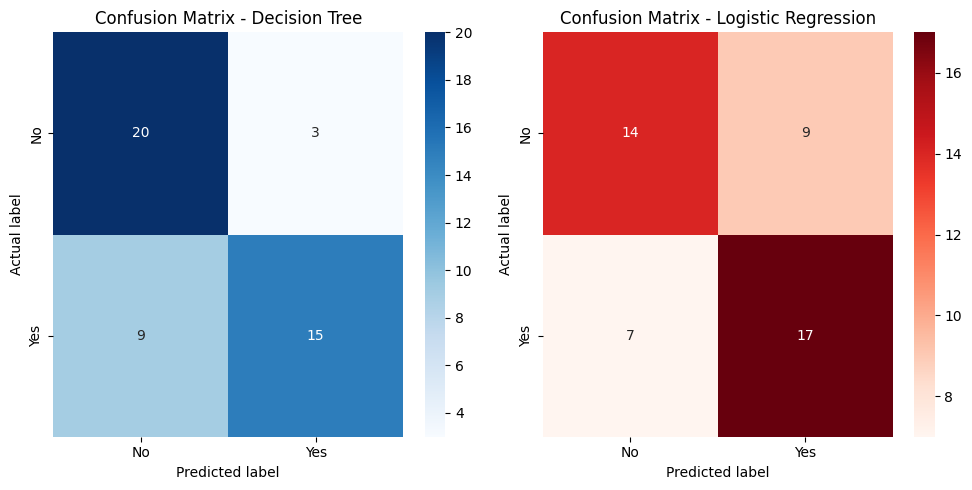

In [20]:
#Subplots of Decision tree and Logistic Regression confusion matrix
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

#Calculate confusion matrix (cm) for Decision tree and Logistic Regression
dt_cm = confusion_matrix(y_test, y_pred_dt)
lr_cm = confusion_matrix(y_test, y_pred_lr)

#subplot of Decision Tree
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', ax=ax1, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
ax1.set_xlabel('Predicted label')
ax1.set_ylabel('Actual label')
ax1.set_title('Confusion Matrix - Decision Tree')

#subplot of Logistic Regression
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Reds', ax=ax2, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
ax2.set_xlabel('Predicted label')
ax2.set_ylabel('Actual label')
ax2.set_title('Confusion Matrix - Logistic Regression')

plt.tight_layout()
plt.show()

## Compare prediction performance of the models with unseen data



In [21]:
# Create a DataFrame to compare actual vs. predicted values
# The index of y_test corresponds to the original row indices from the 'cars' DataFrame
comparison_df = pd.DataFrame({
    'Actual_Sold': y_test, # The true values from the test set
    'dt_Prediction': y_pred_dt, # Decision Tree predictions
    'lr_Prediction': y_pred_lr  # Logistic Regression predictions
})

print(comparison_df.head(10))

     Actual_Sold  dt_Prediction  lr_Prediction
39             0              0              0
68             1              0              0
51             0              0              1
129            1              1              1
130            1              1              0
194            1              1              1
165            1              1              1
19             1              0              1
80             1              1              0
217            0              0              1


**Analyze the agreements and disagreements** between the Decision Tree and Logistic Regression models, determine which model performs better, and explain the reasons for the difference in performance.

**Identify agreements and disagreements**

Compare the 'Decision Tree Prediction' and 'Logistic Regression Prediction' columns in the comparison_df to find rows where the models agree and disagree.

**Analyze disagreements**

Examine the rows where the models disagree and see which model's prediction is correct by comparing it to the 'Actual' column.